In [ ]:
#dsg assn 3

Prob. $1-1$

Gradient Update Rule updation:\
$x_{k+1}=x_k - \alpha \nabla f(x_k) ;$\
$\alpha$ being the learning rate $;$\
The function $f(x)$ around $x_k$ can be approximated using a second-order Taylor expansion:
$$
f\left(x_{k+1}\right) \approx f\left(x_k\right)+\nabla f\left(x_k\right)^{\top}\left(x_{k+1}-x_k\right)+\frac{1}{2}\left(x_{k+1}-x_k\right)^{\top} H_f\left(x_k\right)\left(x_{k+1}-x_k\right)
$$
Substituting the gradient descent update $x_{k+1}=x_k-\alpha \nabla f\left(x_k\right)$ into the above expansion, we get:
$$
f\left(x_{k+1}\right) \approx f\left(x_k\right)-\alpha\left\|\nabla f\left(x_k\right)\right\|^2+\frac{1}{2} \alpha^2 \nabla f\left(x_k\right)^{\top} H_f\left(x_k\right) \nabla f\left(x_k\right)
$$
To minimize $f\left(x_{k+1}\right)$, taking the derivative with respect to $\alpha$ and setting it to zero:
$$
\frac{d}{d \alpha} f\left(x_{k+1}\right) \approx-\left\|\nabla f\left(x_k\right)\right\|^2+\alpha \nabla f\left(x_k\right)^{\top} H_f\left(x_k\right) \nabla f\left(x_k\right)=0
$$
Solving for $\alpha$, we find the critical learning rate:
$$
\alpha_{\text {critical }}=\frac{\left\|\nabla f\left(x_k\right)\right\|^2}{\nabla f\left(x_k\right)^T H_f\left(x_k\right) \nabla f\left(x_k\right)}
$$
For the stability , the eigen values of $I-\alpha H(x)$ must be between $[-1,1]:$
$$
-1<1-\alpha \lambda_i<1
$$
which gives us the solution: $$0<\alpha<\frac{2}{\lambda_{max}}$$
where $\lambda_{max}$ is the largest eigen value of the Hessian Matrix.


Prob. $1-2$

Given
$$
f(x)=\frac{1}{2} x^T ax+ bx + c
$$
$$
\nabla f(x)=ax+b
$$
Gradient Update Rule says:
$$x_{k+1}=x_k - \alpha \nabla f(x)$$
Substituting $\nabla f(x)$:
$$
x_{k+1}=x_k - \alpha (ax+b)
$$
OR
$$
x:= x - \alpha(ax+b)
$$
$$
x:= x(1-a\alpha) -b\alpha
$$
So the Hessian here is $a$ matrix using which we can substitute it in previously derived expression:
$$
\alpha_{\text {critical }}=\frac{\left\|\nabla f\left(x_k\right)\right\|^2}{\nabla f\left(x_k\right)^T H_f\left(x_k\right) \nabla f\left(x_k\right)}
$$
$$
\alpha_{\text {critical }}=\frac{||ax+b||^2}{(ax+b)^T a (ax+b)}
$$
and the same range for the stability of learning rate as solved in the previous problem.

Prob. $1-3$

Given :
$$
f(x_1,x_2)=9x_1^2 + 4x_2^2 + 36x_1 x_2 + 9x_1 + 4x_2 + 10
$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:

def f(x):
    x1, x2 = x
    return 9*x1**2+4*x2**2+36*x1*x2+9*x1+4*x2+10

def grad_f(x):
    x1, x2 = x
    grad_x1 = 18*x1+36*x2+9
    grad_x2 = 8*x2+36*x1+4
    return np.array([grad_x1, grad_x2])

H = np.array([[18, 36], [36, 8]])

eigenvalues=np.linalg.eigvals(H)
lambda_max=np.max(eigenvalues)

def critical_learning_rate(x):
    grad = grad_f(x)
    return np.dot(grad,grad)/np.dot(grad, np.dot(H, grad))

def gradient_descent(f, grad_f, x0, eta, num_steps):
    x = x0
    path = [x0]
    for _ in range(num_steps):
        x = x - eta * grad_f(x)
        path.append(x)
    return np.array(path)

x0 = np.array([0, 0])

num_steps = 250

eta_critical = critical_learning_rate(x0)
eta_stable = 2 / lambda_max
eta_zero = 1e-4
eta_beyond = eta_stable+ 0.1

path_critical = gradient_descent(f, grad_f, x0, eta_critical, num_steps)
path_stable = gradient_descent(f, grad_f, x0, eta_stable, num_steps)
path_zero = gradient_descent(f, grad_f, x0, eta_zero, num_steps)
path_beyond = gradient_descent(f, grad_f, x0, eta_beyond, num_steps)


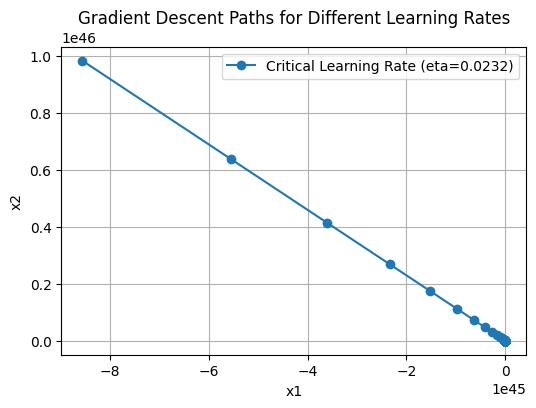

In [18]:
plt.figure(figsize=(6, 4))
plt.plot(path_critical[:, 0], path_critical[:, 1], 'o-', label=f'Critical Learning Rate (eta={eta_critical:.4f})')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Gradient Descent Paths for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()


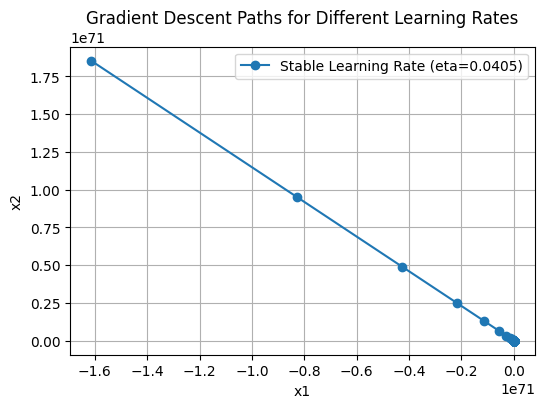

In [16]:
plt.figure(figsize=(6, 4))
plt.plot(path_stable[:, 0], path_stable[:, 1], 'o-', label=f'Stable Learning Rate (eta={eta_stable:.4f})')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Gradient Descent Paths for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

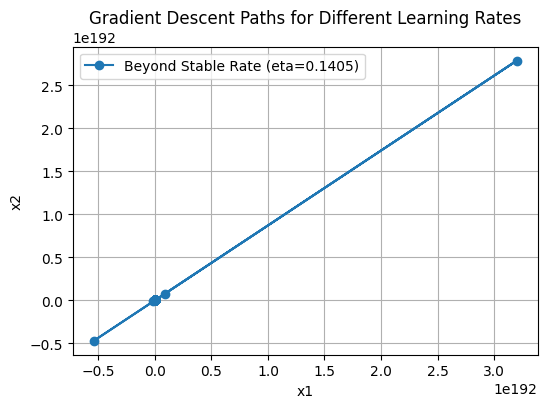

In [15]:
plt.figure(figsize=(6, 4))
plt.plot(path_beyond[:, 0], path_beyond[:, 1], 'o-', label=f'Beyond Stable Rate (eta={eta_beyond:.4f})')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Gradient Descent Paths for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

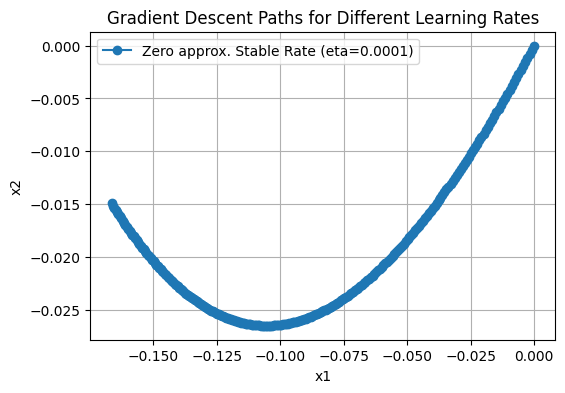

In [17]:
plt.figure(figsize=(6, 4))
plt.plot(path_zero[:, 0], path_zero[:, 1], 'o-', label=f'Zero approx. Stable Rate (eta={eta_zero:.4f})')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Gradient Descent Paths for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

Prob. $2$

Given function to maximise:
$$
50x_1 + 60 x_2
$$
Subject to:
$$
2x_1 + x_2 + x_3=300
$$
$$
3x_1 + 4x_2 + x_4=509
$$
$$
4x_1 + 7x_2 + x_5=812
$$
$$
x_1,x_2,x_3,x_4,x_5>0
$$
The primal problem is already in standard form with equality constraints and non-negativity constraints on the variables.

Constructing the Lagrangian, introducing dual variables $y_1, y_2$, and $y_3$ for the equality constraints. The Lagrangian $\mathcal{L}$ is:
$$
\begin{aligned}
& \mathcal{L}\left(x_1, x_2, x_3, x_4, x_5, y_1, y_2, y_3\right)=50 x_1+60 x_2-y_1\left(2 x_1+x_2+x_3-300\right)-y_2\left(3 x_1+\right.
& \left.4 x_2+x_4-509\right)-y_3\left(4 x_1+7 x_2+x_5-812\right)
\end{aligned}
$$

Rearranging terms, we get:
$$
\begin{aligned}
& \mathcal{L}=\left(50-2 y_1-3 y_2-4 y_3\right) x_1+\left(60-y_1-4 y_2-7 y_3\right) x_2-y_1 x_3-y_2 x_4-y_3 x_5+ 
& 300 y_1+509 y_2+812 y_3
\end{aligned}
$$

To find the dual function $g(y)$, we minimize the Lagrangian with respect to $x_1, x_2, x_3, x_4$, and $x_5$ :
$$
g(y)=\inf _{x_1, x_2, x_3, x_4, x_0} \mathcal{L}
$$

For the Lagrangian to be bounded below with respect to $x_1$ and $x_2$ :
$$
\begin{aligned}
& 50-2 y_1-3 y_2-4 y_3=0 \\
& 60-y_1-4 y_2-7 y_3=0
\end{aligned}
$$
Dual Problem: Maximise this function, given above constraints
$$
300y_1 + 509y_2 + 812 y_3
$$


In [19]:
from scipy.optimize import linprog

result = linprog([300, 509, 812],A_eq = [[2, 3, 4],[1, 4, 7]], b_eq = [50, 60],bounds = [(0, None), (0, None), (0, None)])

print('solution : ',result.x)
print('value at optimum pt. : ',result.fun)

solution :  [ 4. 14.  0.]
value at optimum pt. :  8326.0


Prob. $3$

$$
\begin{aligned}
& \min _{w, b} \frac{1}{2}\|\mathbf{w}\|^2 \\
& \text { Subject to: } \\
& y_i\left(\mathbf{w}^{\top} \mathbf{x}_i+b\right) \geq 1 \quad \forall i
\end{aligned}
$$

Here, $\mathbf{w}$ is the weight vector and $b$ is the bias term.

To derive the dual problem, we first construct the Lagrangian for the primal problem. Introduce Lagrange multipliers $\alpha_i \geq 0$ for each constraint $y_i\left(\mathbf{w}^{\top} \mathbf{x}_i+b\right) \geq 1$ :
$$
\mathcal{L}(\mathbf{w}, b, \alpha)=\frac{1}{2}\|\mathbf{w}\|^2-\sum_{i=1}^n \alpha_i\left[y_i\left(\mathbf{w}^{\top} \mathbf{x}_i+b\right)-1\right]
$$

To find the dual function $g(\alpha)$, we need to minimize the Lagrangian with respect to the primal variables $\mathrm{w}$ and $b$.

Minimizing with respect to $\mathrm{w}$ :
$$
\begin{aligned}
& \frac{\partial \mathcal{L}}{\partial w}=\mathbf{w}-\sum_{i=1}^n \alpha_i y_i \mathbf{x}_i=0 \\
& \mathbf{w}=\sum_{i=1}^n \alpha_i y_i \mathbf{x}_i
\end{aligned}
$$
Minimizing with respect to $b$ :
$$
\begin{aligned}
& \frac{\partial L}{\partial D}=-\sum_{i=1}^n \alpha_i y_i=0 \\
& \sum_{i=1}^n \alpha_i y_i=0
\end{aligned}
$$

Substitute these back into the Lagrangian:
$$
\begin{aligned}
& \mathcal{L}(\mathbf{w}, b, \alpha)=\frac{1}{2}\left\|\sum_{i=1}^n \alpha_i y_i \mathbf{x}_i\right\|^2-\sum_{i=1}^n \alpha_i\left[y_i\left(\sum_{j=1}^n \alpha_j y_j \mathbf{x}_j^{\top} \mathbf{x}_i+b\right)-1\right] \\
& =\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j \mathbf{x}_i^{\top} \mathbf{x}_j-\sum_{i=1}^n \alpha_i y_i\left(\sum_{j=1}^n \alpha_j y_j \mathbf{x}_j^{\top} \mathbf{x}_i+b\right)+\sum_{i=1}^n \alpha_i \\
& =\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j \mathbf{x}_i^{\top} \mathbf{x}_j-\sum_{i=1}^n \alpha_i y_i \sum_{j=1}^n \alpha_j y_j \mathbf{x}_j^{\top} \mathbf{x}_i+\sum_{i=1}^n \alpha_i \\
& =\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j \mathbf{x}_i^{\top} \mathbf{x}_j-\sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j \mathbf{x}_i^{\top} \mathbf{x}_j+\sum_{i=1}^n \alpha_i \\
& =\sum_{i=1}^n \alpha_i-\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j \mathbf{x}_i^{\top} \mathbf{x}_j
\end{aligned}
$$

The dual problem is:
$$
\max _\alpha \sum_{i=1}^n \alpha_i-\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j \mathbf{x}_i^{\top} x_j
$$

Subject to:
$$
\begin{aligned}
& \sum_{i=1}^n \alpha_i y_i=0 \\
& \alpha_i \geq 0 \quad \forall i
\end{aligned}
$$